# **Proyek 1 Predictive Analytics**

## **Data Preparation**

Import seluruh library yang dibutuhkan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Tarik dataset StudentPerformance.csv ke direktory google collab lalu gunakan pandas untuk mengubahnya menjadi dataframe.
Info dataset ditampilkan sebagai berikut.

In [2]:
df = pd.read_csv('/content/StudentsPerformance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Menampilkan kategori apa saja yang terdapat dalam kolom-kolom non numerik value

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


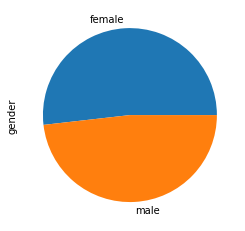

In [4]:
df['gender'].value_counts().plot.pie()

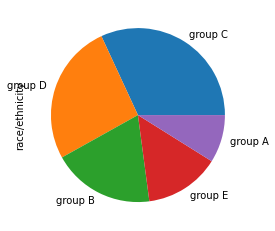

In [5]:
df['race/ethnicity'].value_counts().plot.pie()


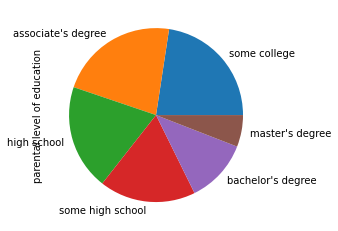

In [6]:
df['parental level of education'].value_counts().plot.pie()

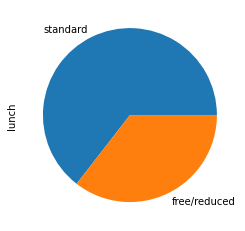

In [7]:
df['lunch'].value_counts().plot.pie()

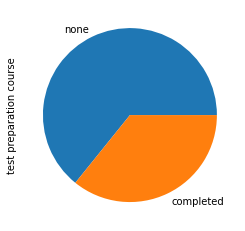

In [8]:
df['test preparation course'].value_counts().plot.pie()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


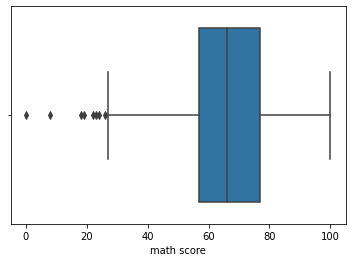

In [9]:
import seaborn as sns
sns.boxplot(df['math score'])

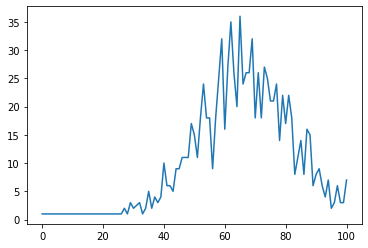

In [10]:
df['math score'].value_counts().sort_index().plot()

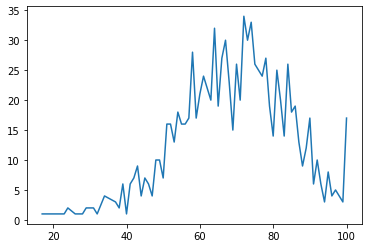

In [11]:
df['reading score'].value_counts().sort_index().plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


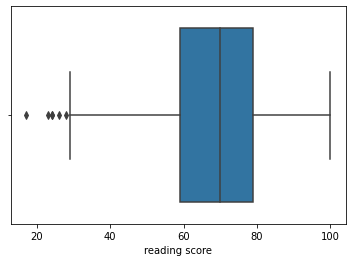

In [12]:
sns.boxplot(df['reading score'])

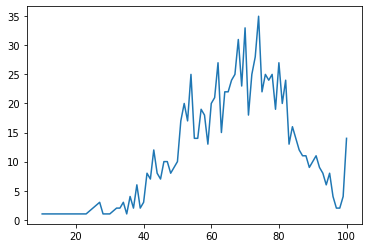

In [13]:
df['writing score'].value_counts().sort_index().plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


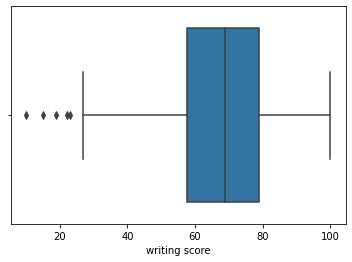

In [14]:
sns.boxplot(df['writing score'])

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(988, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       988 non-null    object
 1   race/ethnicity               988 non-null    object
 2   parental level of education  988 non-null    object
 3   lunch                        988 non-null    object
 4   test preparation course      988 non-null    object
 5   math score                   988 non-null    int64 
 6   reading score                988 non-null    int64 
 7   writing score                988 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 69.5+ KB


In [17]:
for i in df.columns[0:5]:
  print(i)
  print(set(df[i]))

gender
{'male', 'female'}
race/ethnicity
{'group B', 'group C', 'group A', 'group E', 'group D'}
parental level of education
{'high school', 'some high school', "bachelor's degree", "master's degree", "associate's degree", 'some college'}
lunch
{'standard', 'free/reduced'}
test preparation course
{'none', 'completed'}


Memeriksa adakah value yang bernilai 'nol'. Karena terdeteksi nilai nol terdapat pada kolom m*ath score* yang memang berupa numerik value, maka nilai nol tidak akan menjadi gangguan.

In [18]:
print((df[::] == 0).sum())
df.describe()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


,math score,reading score,writing score
count,988.000000,988.000000,988.000000
mean,66.625506,69.640688,68.566802
std,14.409394,14.016760,14.525267
min,27.000000,29.000000,27.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


Lakukan proses One Hot Encoder yang akan mengubah data non-numerik menjadi data nnumerik bernilai biner untuk setiap kategori valuenya. Kemudian pisahkan mana yang akan menjadi atribut dan target pada training model nantinya.

In [19]:
gender = pd.get_dummies(df['gender'])
etnis = pd.get_dummies(df['race/ethnicity'])
parent = pd.get_dummies(df['parental level of education'])
lunch = pd.get_dummies(df['lunch'])
prep = pd.get_dummies(df['test preparation course'])

df = pd.concat([df, gender, etnis, parent, lunch, prep], axis=1)

df = df.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], axis=1)

atribut = df.copy()
atribut = atribut.drop(['math score', 'reading score', 'writing score'], axis=1)

nilai_rata = (df['math score'] + df['reading score'] + df['writing score'])/3
target = nilai_rata.astype('int')
atribut = atribut

Nilai rata-rata ketiga test siswa yang telah diperoleh sebelumnya diubah kembali menjadi lima prediket dari A sampai E.

In [20]:
from re import A
nil = []
for i in target:
  #print(i)
  if i >= 90:
    nil.append('A')
  elif i >80 and i <89:
    nil.append('B')
  elif i >70 and i < 79:
    nil.append('C')
  elif i > 60 and i < 69:
    nil.append('D')
  else:
    nil.append('E')
print(nil)

['C', 'B', 'A', 'E', 'C', 'C', 'A', 'E', 'D', 'E', 'E', 'E', 'C', 'C', 'E', 'C', 'B', 'E', 'E', 'D', 'E', 'E', 'C', 'C', 'C', 'E', 'E', 'D', 'E', 'C', 'D', 'D', 'E', 'B', 'E', 'E', 'E', 'B', 'E', 'E', 'D', 'E', 'D', 'E', 'E', 'E', 'C', 'E', 'B', 'E', 'C', 'E', 'E', 'E', 'E', 'B', 'E', 'E', 'C', 'E', 'E', 'C', 'E', 'D', 'E', 'D', 'E', 'E', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'E', 'E', 'E', 'D', 'E', 'C', 'B', 'C', 'D', 'E', 'E', 'E', 'C', 'E', 'B', 'E', 'D', 'D', 'D', 'D', 'C', 'C', 'B', 'E', 'A', 'D', 'A', 'D', 'D', 'D', 'B', 'E', 'E', 'E', 'A', 'C', 'E', 'E', 'E', 'D', 'B', 'A', 'A', 'E', 'C', 'E', 'E', 'C', 'E', 'E', 'B', 'E', 'C', 'E', 'C', 'E', 'E', 'E', 'D', 'D', 'C', 'D', 'E', 'E', 'E', 'B', 'E', 'C', 'A', 'D', 'E', 'D', 'E', 'D', 'B', 'C', 'E', 'C', 'D', 'C', 'B', 'E', 'E', 'B', 'A', 'E', 'E', 'C', 'E', 'C', 'B', 'B', 'D', 'E', 'B', 'E', 'C', 'D', 'A', 'D', 'E', 'E', 'D', 'E', 'D', 'C', 'D', 'E', 'B', 'D', 'E', 'D', 'D', 'E', 'E', 'D', 'E', 'E', 'C', 'E', 'C', 'C', 'D',

Nilai yang telah berupa prediket tadi diubah lagi menjadi data frame supaya bisa dilakukan proses one hot encoder dan menghasilak seperti berikut.

In [21]:
lin = pd.DataFrame(nil, columns=['nilai'],)
nilai = pd.get_dummies(lin['nilai'])
print(nilai)

     A  B  C  D  E
0    0  0  1  0  0
1    0  1  0  0  0
2    1  0  0  0  0
3    0  0  0  0  1
4    0  0  1  0  0
..  .. .. .. .. ..
983  1  0  0  0  0
984  0  0  0  0  1
985  0  0  0  1  0
986  0  0  1  0  0
987  0  1  0  0  0

[988 rows x 5 columns]


Bagi data menjadi data training dan data test.

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(atribut, nilai, test_size=0.2, random_state=42)

## **Modelling**

Model berupa neural network empat layer dengan 17 input dan 5 output. Optimizer yang digunakan *sgd* dan metrik *accuracy*

In [23]:
model = Sequential([    
                    Dense(17, activation='relu', input_shape=(17,)),    
                    Dense(13, activation='relu'),
                    Dense(9, activation='relu'),    
                    Dense(5, activation='softmax'),])

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

Proses training dengan data train dan validation menggunakan data test.

In [24]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 0.1593 - accuracy: 0.2152 - val_loss: 0.1584 - val_accuracy: 0.2273
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1592 - accuracy: 0.2266 - val_loss: 0.1582 - val_accuracy: 0.2273
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1590 - accuracy: 0.2380 - val_loss: 0.1580 - val_accuracy: 0.2475
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1588 - accuracy: 0.2430 - val_loss: 0.1577 - val_accuracy: 0.2576
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1587 - accuracy: 0.2468 - val_loss: 0.1575 - val_accuracy: 0.2677
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1585 - accuracy: 0.2519 - val_loss: 0.1573 - val_accuracy: 0.2879
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1584 - accuracy: 0.2557 - val_loss: 0.1571 - val_accuracy: 0.3030
Epoch 8/100


Menampilkan accuracy dan val_accuracy secara visual

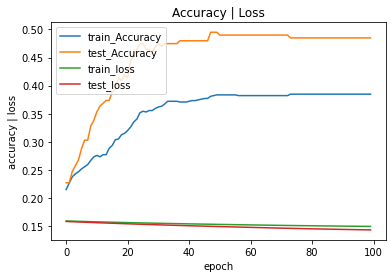

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Accuracy | Loss')
plt.ylabel('accuracy | loss')
plt.xlabel('epoch')
plt.legend(['train_Accuracy', 'test_Accuracy', 'train_loss', 'test_loss'], loc='upper left')
plt.show()